Spring 2021
<img src="https://www.cuipcairo.org/sites/default/files/styles/medium/public/49658177_2020840098011471_2893445443553853440_n.png?itok=672tzxcF"
 width="80px" align="right">

CIE 555, Neural Networks and Deep Learning

University of Science and Technology, Zewail City

<br>

<h1 align="center">Lab 4</h3>
<h1 align="center">Training Neural Networks: Part I</h3>
<h2 align="center">Overfitting and Regularization</h2>
<h3 align="center">Shahd Seddik</h3>

---

#Lab Objectives
* Understand the key steps when training a deep learning model.
* Understand the relationship between model complexity and overfitting.
* Learn how to detect overfitting and underfitting from a neural network's learning curve.
* Learn how to avoid overfitting using different regularization techniques.

# Steps of Training a Deep Learning Model

1. Define your problem
1. Prepare your data
1. Choose your model and appropriately initialize it
1. Train the chosen model
1. Improve results
1. Present results

# Dataset

One of the most often cited papers about deep learning in combination with a physics application:
*Searching for Exotic Particles in High-Energy Physics with Deep Learning* by Pierre Baldi, Peter Sadowski, Daniel Whiteson.

We will use the [Higgs Dataset](http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz) to train a binary classification model.

The dataset contains 11,000,000 instances, with 28 features each.

Download the dataset `HIGGS.h5` by running the cell below. An H5 file is a data file saved in the Hierarchical Data Format (HDF). It contains multidimensional arrays of scientific data and is designed to store large amounts of data efficiently.

Alternatively, you can download the compressed CSV file from [this link](https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz), and then extract it, but you will notice the file is much larger in size.

In [2]:
!wget http://mlphysics.ics.uci.edu/data/higgs/HIGGS.h5

--2021-04-08 06:30:35--  http://mlphysics.ics.uci.edu/data/higgs/HIGGS.h5
Resolving mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)... 128.195.1.86
Connecting to mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1276002144 (1.2G)
Saving to: ‘HIGGS.h5’

HIGGS.h5            100%[===================>]   1.19G  42.0MB/s    in 30s     

2021-04-08 06:31:05 (41.0 MB/s) - ‘HIGGS.h5’ saved [1276002144/1276002144]



In [3]:
import numpy as np
import h5py

file_ = h5py.File("HIGGS.h5", 'r')
inputs = np.array(file_["features"])
targets = np.array(file_["targets"])

In [3]:
print(inputs.shape)
print(targets.shape)

(11000000, 28)
(11000000, 1)


We will take a subset of the data to save time. Skip the next two cells if you want to use the entire dataset.

In [4]:
n_samples = 20000 # number of samples to take

indices = np.random.randint(inputs.shape[0], size = n_samples) # generate random indices

inputs = inputs[indices, :]
targets = targets[indices, :]

In [5]:
print(inputs.shape)
print(targets.shape)

(20000, 28)
(20000, 1)


Let's take a look at the data.

In [5]:
FEATURES = inputs.shape[1]
FEATURES

28

In [7]:
print(inputs[0])
print(targets[0])

[ 1.9131771  -1.4941223  -1.2836379   0.14810051 -0.31956303  1.6488384
  0.9842631   0.30728483  1.0865381   1.8243417  -1.2287273  -1.7101915
  2.2148721   0.929915   -0.08174949 -0.13055988  0.          0.8266107
  0.6241568   0.66795266  0.          0.7757491   1.2222166   0.9801481
  0.8024908   4.315156    2.3015263   1.6772343 ]
[0.]


## Pre-processing

Let's split our dataset into training and test sets.

Then, we will fit a pre-processing function to standardize features by removing the mean and scaling to unit variance.

The standard score of a sample $x$ is calculated as

$z = (x - \mu) / \sigma$

where $\mu$ is the mean of the training samples, and $\sigma$ is the standard deviation of the training samples.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
        inputs, targets, test_size=0.10, random_state=42, shuffle=True)

# Set up preprocessing 
preprocessing_input = StandardScaler()
preprocessing_input.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Overfitting and Underfitting

Supervised machine learning can be thought of as approximating a target function $f$ that maps input point $X$ to output $y$ (i.e. $y=f(X)$).

It is crucial that the learned function be able to generalize well over new, unseen data. This allows us to make accurate predictions in the future on data the model has never seen.

So, what is overfitting? And when does it happen? (Discussion)

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1200px-Overfitting.svg.png"
 width="200px"> </center>
 
>- Overfitting refers to the problem when a model learns (or memorizes) the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
- What is meant by the representational capacity of a model?
- (Fill in the blank) Overfitting is more likely to happen when the model has ............... (larger/smaller) representational capacity.


On the other hand, underfitting happens when the model is neither able to model the training data nor able to generalize to new data.

To summarize:
<center><img src="https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvNWUoWieQqaGmU_gl9%2F-LvNoby-llz4QzAK15nL%2Fimage.png?alt=media&token=41720ce9-bb66-4419-9bd8-640abf1fc415"
 width="400px"> </center>

 In the context of neural networks, overfitting and underfitting can be detected by looking at the training and validation loss during training.
 
<center><img src="https://drek4537l1klr.cloudfront.net/cai/Figures/08fig06_alt.jpg"
 width="600px"> </center>

 >- (Q) Assuming the three graphs above were generated from three different models over the same dataset. Which model is the most complex? Which is the least?

# Models

Let's build neural nets to solve this classification problem! We will build 4 different models with varying complexities to explore overfitting and underfitting.

Each model will use the same `compile` and `fit` methods, so let's code functions to make our code cleaner and more modular.

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

BATCH_SIZE = 500
EPOCHS = 200

def get_optimizer():
  return Adam()

def compile_and_fit(model, optimizer=None, max_epochs=1000, callbacks=[]):
  if optimizer is None:
    optimizer = get_optimizer()
  
  # Compile model and print summary
  model.compile(optimizer = optimizer,
                loss = "binary_crossentropy",
                metrics = ['accuracy'])

  model.summary()

  # Fit model to training data
  history = model.fit(
    x = preprocessing_input.transform(X_train), # do not forget to normalize X
    y = y_train,
    batch_size = BATCH_SIZE,
    epochs = max_epochs,
    validation_split = 0.1,
    callbacks=callbacks)

  return history

# Create a dictionary to store the histories of all trained models
model_histories = {}

Now, let's get to building our 4 models! We will call them tiny model, small model, medium model, and large model.

In [8]:
# Model 1
tiny_model = Sequential([
    Dense(16, activation='relu', input_shape=(FEATURES,)),
    Dense(1, activation="sigmoid")
])

# Model 2
small_model = Sequential([
    Dense(16, activation='relu', input_shape=(FEATURES,)),
    Dense(16, activation='relu'),
    Dense(1, activation="sigmoid")
])

# Model 3
medium_model = Sequential([
    Dense(64, activation='relu', input_shape=(FEATURES,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation="sigmoid")
])

# Model 4
large_model = Sequential([
    Dense(512, activation='relu', input_shape=(FEATURES,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation="sigmoid")
])

# Training

In [12]:
model_histories['Tiny'] = compile_and_fit(tiny_model, max_epochs = EPOCHS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                464       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 3s 19ms/step - loss: 0.7487 - accuracy: 0.4937 - val_loss: 0.7178 - val_accuracy: 0.5078
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7129 - accuracy: 0.5151 - val_loss: 0.6982 - val_accuracy: 0.5461
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5372 - val_loss: 0.6856 - val_accuracy: 0.5583
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.56

In [13]:
model_histories['Small'] = compile_and_fit(small_model, max_epochs = EPOCHS)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 10ms/step - loss: 0.7653 - accuracy: 0.5198 - val_loss: 0.7101 - val_accuracy: 0.5144
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7050 - accuracy: 0.5194 - val_loss: 0.6933 - val_accuracy: 0.5289
Epoch 3/200
33/33 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5405 - va

In [14]:
model_histories['Medium']  = compile_and_fit(medium_model, max_epochs = EPOCHS)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1856      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 9ms/step - loss: 0.6874 - accuracy: 0.5393 - val_loss: 0.6613 - val_accuracy: 0.5961
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 0.6539 - accuracy: 0.6112 - val_lo

In [15]:
model_histories['Large'] = compile_and_fit(large_model, max_epochs = EPOCHS)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               14848     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 14ms/step - loss: 0.6625 - accuracy: 0.5933 - val_loss: 0.

## Plot the training and validation losses

Let's build a function to help us generate clean plots.

In [9]:
import matplotlib.pyplot as plt
import random

def plotter(history_dict):
  """
  Plots loss, val_loss of multiple models on the same graph.

  Input:
   - history_dict: dictionary of model names (keys) and history objects (values)
  """
  plt.figure(figsize=(8, 6))
  plt.xscale('log')
  #plt.xlim([5, max(plt.xlim())])
  plt.ylim([0.5, 0.7])
  plt.grid(True)
  for model_name in history_dict.keys(): # loop over the passed model names
    history = history_dict[model_name] # get history variable from the dictionary
    plt.plot(history.history['loss'],
             linestyle='-', # solid line
             label = model_name + ' Train')
    plt.plot(history.history['val_loss'],
             linestyle='--', # dashed line
             label = model_name + ' Val')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

  plt.legend(loc='lower left')
  plt.show()

Now, let's compare the learning curves of our four models. What do you notice?

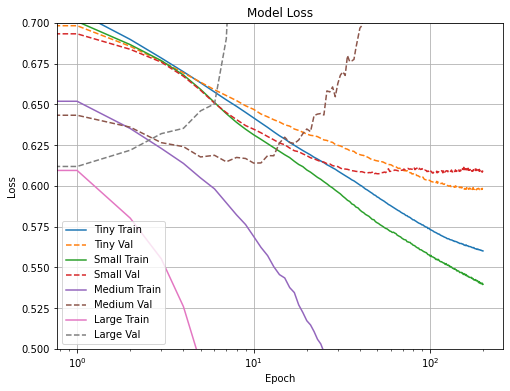

In [38]:
plotter(model_histories)

# Evaluation

In [18]:
tiny_loss, tiny_acc = tiny_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.5305


In [19]:
small_loss, small_acc = small_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.5350


In [20]:
medium_loss, medium_acc = medium_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 2.3273 - accuracy: 0.5250


In [21]:
large_loss, large_acc = large_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 3.7563 - accuracy: 0.5325


# Preventing Overfitting

As we have seen, overfitting happens when the model is too complex for the data. That is, when a simpler model exists that can accurately model the data, the more complex model is likely to overfit to the training samples.

To prevent this from happening, we can apply one or more regularization techniques. **Regularization** refers to modifications to the learning algorithm such that the model generalizes better. The idea is to penalize complexity so the model is forced to learn the simplest possible representation of the training data.

Multiple regularization techniques exist, such as:
1. Weight regularization
    1. L1
    2. L2
2. Dropout
3. Early stopping
4. Data augmentation
5. Noise injection

In this lab, we will explore the first three.

## Weight Regularization

One way to penalize complexity is to penalize large weights. This is done by adding all our parameters (weights) to our loss function. The new loss function thus becomes

$ J(w) + \frac{\lambda}{2} \sum_{j=1}^{M}\left|w_{j}\right|^{q}$

>- When $q=1$, we call it **L1 regularization** (we are adding what is called the "L1 norm" of the weights).
- When $q=2$, we call it **L2 regularization** (we are adding what is called the "L2 norm" of the weights).
- (Q) What happens when the parameter $\lambda$ is increased?

In [22]:
regularizer_histories = {} # new dictioanry to store regularized model histories
regularizer_histories['Tiny'] = model_histories['Tiny']
regularizer_histories['Large'] = model_histories['Large']

In [23]:
from keras.regularizers import l2

l2_lambda = 0.01
l2_model = Sequential([
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda),
                 input_shape = (FEATURES,)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(512, activation = 'relu',
                 kernel_regularizer = l2(l2_lambda)),
    Dense(1, activation = "sigmoid")
])

regularizer_histories['l2'] = compile_and_fit(l2_model, max_epochs = EPOCHS)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 15ms/step - loss: 12.4992 - accuracy: 0.5412 - val_loss: 4

## Dropout

The intuitive explanation for dropout is that we need to force each node to output features that are useful on their own.

Dropout involves randomly "dropping out" (i.e. setting to zero) a number of output features of a layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

The "dropout rate" is a hyperparameter specifying the fraction of features that are being zeroed-out; it is usually set between 0.2 and 0.5.

<center><img src="http://cs231n.github.io/assets/nn2/dropout.jpeg"
 width="400px"> </center>

Note that at test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [24]:
from keras.layers import Dropout

dropout_rate = 0.5

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(FEATURES,)),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation = "sigmoid")
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, max_epochs = EPOCHS)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)              

Now, let's plot the learning curves. What do you notice?

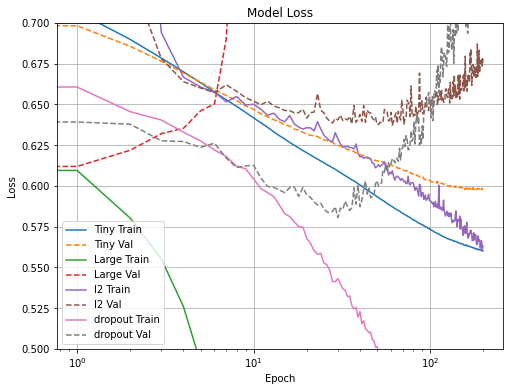

In [25]:
plotter(regularizer_histories)

>(Discussion) Take another look at the loss curves of the dropout model. The model keeps improving until a certain point, after which it starts overfitting, resulting in a poor final model. Suggest one possible solution that can help improve the final model without changing any of its parameters.

# Task

Your task is to improve the learning curve even further by applying the following models:
1. Model 1: Add both L1 and L2 regularization to the large model. Adjust the parameters to minimize overfitting.
1. Model 2: Apply early stopping to the large model with dropout and choose appropriate parameters.
1. Plot the losses of each of the new models. Comment on your results.

## Bonus Questions

1. [0.5 pt] In the code above, we used `kernel_regularizer`. What is the difference between `kernel_regularizer`, `bias_regularizer`, and`activity_regularizer` in Keras?
> Kernel Regularizers reduce the weights W of the regression equation y = Wx + b, Bias Regularizers will reduce the bias of the regression equation, and activity regularizers will reduce the whole layer output y so it will change both W and b. <a href="https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t">source</a>.
1. [0.5 pt] When should you use each?
> Kernel Regularizers are used if we have no prior on the distribution we wish to model, because a large network has a large capacity to fit the training set even if the weights are small due to regularization, bias regularizers are useful if we want to force our output function to have an intercept close to the origin, and activity regularizers are used if we want the output to be as small as possible. <a href="https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t">source</a>.
1. [1 pt] What is the difference between the effect of L1 regularization and that of L2 regularization? Explain in light of the figure below.
<center><img src="https://miro.medium.com/max/602/0*_pKBpbrub8v6np5x.png" width="300px"></center>

    > For two weights w1 and w2, the contribution of L1 regularizer to the loss is |w1|+|w2| <= a where a is the maximum penalty. This equation is plotted as the rhombus shown in the above figure, and the intersection between this rhombus and the loss function contours is the equilibrium point that we will reach, and at this point we have w1=0 so L1 regularization tends to create a sparse matrix of weights. For L2 regularization the contribution to the loss is w1^2 + w2^2 <=a which represents a circle and the intersection between this circle and the loss function contours, which is the equilibrium point is a point where both w1 and w2 are small but not zero. To conclude, L1 pushes some of the weights to become zero while L2 pushes the weight to a small but non-zero value.

In [39]:
new_regularizer_histories = {} # new dictioanry to store new regularized model histories

### First I use a grid search to find suitable values for the regularization parameters l1_lambda and l2_lambda

In [10]:
from keras.regularizers import L1L2
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(l1_lambda, l2_lambda):
  l1_l2_model = Sequential([
      Dense(512, activation = 'relu',
                  kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda),
                  input_shape = (FEATURES,)),
      Dense(512, activation = 'relu',
                  kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda)),
      Dense(512, activation = 'relu',
                  kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda)),
      Dense(512, activation = 'relu',
                  kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda)),
      Dense(1, activation = "sigmoid")
  ])
  l1_l2_model.compile(optimizer = get_optimizer(),
                loss = "binary_crossentropy",
                metrics = ['accuracy'])
  return l1_l2_model


l1_lambdas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.4]
l2_lambdas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.4]

param_grid = {'l1_lambda':l1_lambdas, 'l2_lambda':l2_lambdas}
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=BATCH_SIZE, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(preprocessing_input.transform(X_train), y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.697611 using {'l1_lambda': 1e-05, 'l2_lambda': 0.01}


### Now I will use the parameters obtained to train the network and plot the learning curve

In [35]:
from keras.callbacks import EarlyStopping

l1_lambda = 1e-05
l2_lambda = 0.01

l1_l2_model = Sequential([
    Dense(512, activation = 'relu',
                kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda),
                input_shape = (FEATURES,)),
    Dense(512, activation = 'relu',
                kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda)),
    Dense(512, activation = 'relu',
                kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda)),
    Dense(512, activation = 'relu',
                kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda)),
    Dense(1, activation = "sigmoid")
])

new_regularizer_histories = {}
new_regularizer_histories['l1_l2'] = compile_and_fit(l1_l2_model, max_epochs = EPOCHS)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_45 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_46 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_47 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 11ms/step - loss: 12.7551 - accuracy: 0.5625 - val_loss: 

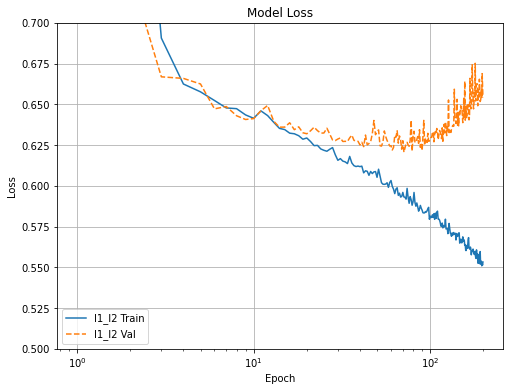

In [36]:
plotter(new_regularizer_histories)

### The validation loss reaches a decent number, but the as the model keeps learning it overfits the training set, so validation loss increases.
### My solution is to use early stopping to halt the training once the validation loss starts increasing.

In [39]:
from keras.callbacks import EarlyStopping

l1_lambda = 1e-05
l2_lambda = 0.01

l1_l2_model = Sequential([
    Dense(512, activation = 'relu',
                kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda),
                input_shape = (FEATURES,)),
    Dense(512, activation = 'relu',
                kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda)),
    Dense(512, activation = 'relu',
                kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda)),
    Dense(512, activation = 'relu',
                kernel_regularizer = L1L2(l1=l1_lambda, l2=l2_lambda)),
    Dense(1, activation = "sigmoid")
])

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
new_regularizer_histories['l1_l2_early'] = compile_and_fit(l1_l2_model, max_epochs = EPOCHS, callbacks=[es])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_52 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
33/33 [==============================] - 1s 11ms/step - loss: 12.7576 - accuracy: 0.5680 - val_loss: 

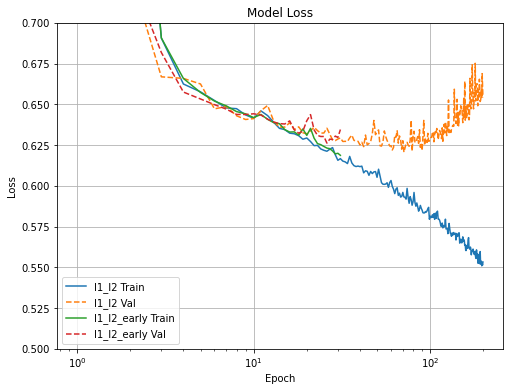

In [40]:
plotter(new_regularizer_histories)

### Above graph shows the new model with early stopping as it stops the learning process after the best value for the validation loss is achieved.

### Now I will use dropout and use grid search to tune the dropout rate hyperparameter

In [54]:
from keras.layers import Dropout

def create_model(dropout_rate):
  dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(FEATURES,)),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation = "sigmoid")
  ])
  dropout_model.compile(optimizer = get_optimizer(),
                loss = "binary_crossentropy",
                metrics = ['accuracy'])
  return dropout_model


dropout_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
param_grid = {'dropout_rate':dropout_rates}
model = KerasClassifier(build_fn=create_model, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(preprocessing_input.transform(X_train), y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.691222 using {'dropout_rate': 0.7}


### The best dropout rate will be used to train the network and draw the learning curve

In [57]:
dropout_rate = 0.7

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(FEATURES,)),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation = "sigmoid")
])

new_dropout_history = {}
new_dropout_history['dropout'] = compile_and_fit(dropout_model, max_epochs = EPOCHS)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 512)             

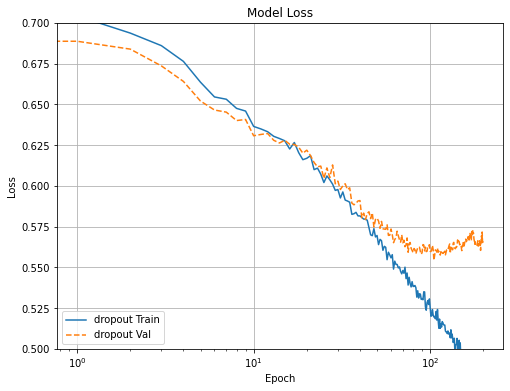

In [58]:
plotter(new_dropout_history)

### Once again we see the same problem with the validation loss as the network starts to overfit the training set, so validation loss starts increasing. To solve this problem I will use early stopping

In [59]:
dropout_rate = 0.7

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(FEATURES,)),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation = "sigmoid")
])

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
new_dropout_history['dropout_early'] = compile_and_fit(dropout_model, max_epochs = EPOCHS, callbacks=[es])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 512)             

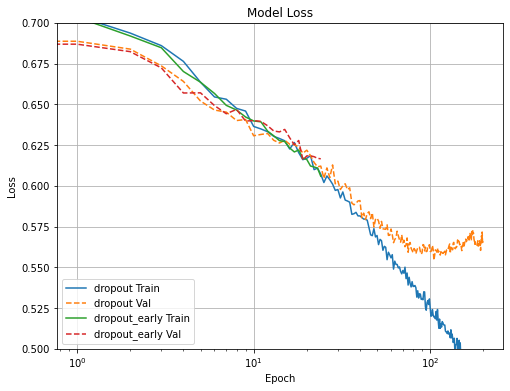

In [60]:
plotter(new_dropout_history)

### The above graph shows a very early stopping, so I will increase the patience to get the model to stop at the best validation loss observed in the graph.

In [61]:
dropout_rate = 0.7

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(FEATURES,)),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(512, activation='relu'),
    Dropout(dropout_rate),
    Dense(1, activation = "sigmoid")
])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
new_dropout_history['dropout_early'] = compile_and_fit(dropout_model, max_epochs = EPOCHS, callbacks=[es])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 512)             

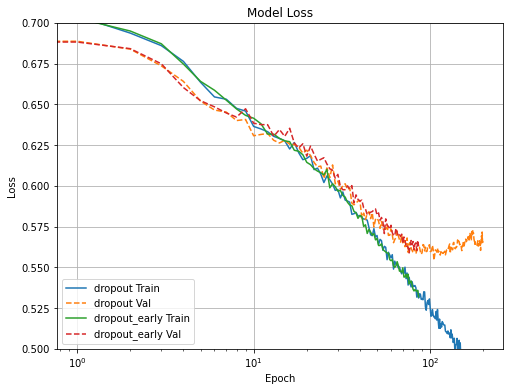

In [62]:
plotter(new_dropout_history)

### Now the network stops the training at the desired point where validation loss is at its minimum.

# References
* https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/
* https://github.com/stwunsch/fermilab_keras_workshop
* https://www.tensorflow.org/tutorials/keras/overfit_and_underfit